## Capstone Module 3

## **Content**

1. Business Undertanding

- Context
Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.
The bike-sharing service is an essential component of urban mobility, providing an eco-friendly and convenient transportation option. However, the demand for bike-sharing services fluctuates significantly based on various factors, including the time of day and weather conditions. These fluctuations present challenges in ensuring the availability of bikes when and where they are needed most. By accurately forecasting the hourly demand for bike-sharing services, considering weather conditions, the company can optimize its operations, enhance user satisfaction, and reduce operational costs.

- Problem Statement
The bike-sharing service needs to forecast the number of bike-sharing users by hour while considering weather conditions. This forecast will help in making informed decisions regarding bike distribution, maintenance schedules, and resource allocation, ultimately improving service efficiency and user satisfaction.

- Stakeholders
    - Bike-sharing Company: Needs accurate demand forecasts to optimize operations and improve service.
    - Users: Benefit from higher availability and reliability of bikes.

- Objective
    - Develop an Accurate Forecasting Model: Create a machine learning model that accurately predicts the hourly demand for bike-sharing services.
    - Incorporate Weather Data: Ensure the model takes into account various weather conditions such as temperature, humidity, wind speed, and precipitation.
    - Optimize Operations: Use the forecasting model to enhance the efficiency of bike distribution and maintenance schedules.
    - Improve User Satisfaction: Increase the availability and reliability of bikes during peak demand times and adverse weather conditions.

- Analytic Approach
    1. Data Collection and Preparation:

        - Collect historical bike usage data and weather data.
        - Clean the data by handling missing values, outliers, and ensuring consistency.
        - Perform exploratory data analysis (EDA) to understand patterns and correlations between bike usage and weather conditions.

    2. Feature Engineering:

        - Create new features from the datetime data (e.g., hour of the day, day of the week, season).
        - Generate lagged features and moving averages to capture temporal dependencies.
        - Transform weather data into relevant features (e.g., temperature categories, precipitation intensity).

    3. Model Selection and Training:

        - Choose appropriate machine learning algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting, XGB).
        - Train multiple models and select the best-performing one based on validation metrics.
        - Perform hyperparameter tuning to optimize model performance.

    4. Model Evaluation:

        - Use a validation dataset to assess model accuracy and reliability.
        - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared.
        - Conduct cross-validation to ensure the model's generalizability.

    5. Metric Evaluation
        - Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction. It provides a straightforward interpretation of prediction accuracy.

        - Root Mean Squared Error (RMSE): Measures the square root of the average of squared differences between prediction and actual observation. It gives a higher weight to large errors, making it useful for identifying significant prediction errors.

        - R-squared (R²): Represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides insight into the model's explanatory power.

**Desription of Features**

| Features                  | Description                                                                                                                                    |
|---------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
|``dteday``                 | The date when the trip was occured.                                                                                                            |  
|``hum``                    | normalized humidity during the trip. The values are divided into 100 (max).                                                                    |
|``weathersit``             | A numeric code signifying weather situation during the day.                                                                                    |
|                           |1 = Clear, Few clouds, Partly cloudy, Partly cloudy                                                                                             |
|                           |2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                                                |
|                           |3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                                                     |
|                           |4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                                                                  |
|``holiday``                | A numeric code signifying wheter the day of recorded data is holiday or not.                                                                   |
|                           |0 = Not Holiday                                                                                                                                 |
|                           |1 = Holiday                                                                                                                                     |
|``season``                 | A numeric code indicating what season during the trip.                                                                                         |
|                           |1 = Winter                                                                                                                                      |
|                           |2 = Spring                                                                                                                                      |
|                           |3 = Summer                                                                                                                                      |
|                           |4 = Fall                                                                                                                                        |
|``atemp``                  | Ambience temperature recorded (in Celcius), The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale).       |
|``temp``                   | Temperature recorded (in Celcius), The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale).                 |
|``hr``                     | Total trip hour during the day (0 to 23).                                                                                                      |
|``casual``                 | Number count of casual users (Not registered) during the trip.                                                                                 |
|``registered``             | Number count of registered users during the trip.                                                                                              |
|``cnt``                    | count of total rental bikes including both casual and registered.                                                                              |   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_bike_sharing (1).csv')

In [3]:
display(df.head(),df.tail())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69
12164,2011-04-28,0.47,1,0,2,0.6212,0.64,18,44,486,530


In [4]:
print(f'Number of rows and column in the datasets {df.shape}')
df.info()

Number of rows and column in the datasets (12165, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,dteday,object,0.0,0.0,0.000,0,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-3..."
1,hum,float64,0.0,0.0,0.115,0,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
2,weathersit,int64,0.0,0.0,0.000,0,4,"[1, 2, 3, 4]"
3,holiday,int64,0.0,0.0,97.024,0,2,"[0, 1]"
4,season,int64,0.0,0.0,0.000,0,4,"[4, 2, 3, 1]"
5,atemp,float64,0.0,0.0,0.008,0,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515..."
6,temp,float64,0.0,0.0,0.000,0,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
7,hr,int64,0.0,0.0,4.349,0,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
8,casual,int64,0.0,0.0,9.248,0,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, ..."
9,registered,int64,0.0,0.0,0.115,0,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 2..."


From the data skimming that we done, we can see that most of the data is clean, but nontheles we need to change the data_type of dteday into datetime, and extract additional data from the dteday such as day of week and month

In [6]:
# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
# Extract additional features from 'dteday'
df['day_of_week'] = df['dteday'].dt.dayofweek
df['month'] = df['dteday'].dt.month

We need to handle the zero values in the humidity and atemp eventhough the number of zero values is minimum (0.115% for the hum, and 0.008 for the atemp)

In [8]:
# Handle zero values in 'hum' and 'atemp'
df['hum'] = df['hum'].replace(0, df['hum'].mean())
df['atemp'] = df['atemp'].replace(0, df['atemp'].mean())

In [9]:
display(df.head(),df.tail())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,day_of_week,month
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,12
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,6
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,6
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,3
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,7


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,day_of_week,month
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,2,1
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,4,7
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,2
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,5,3
12164,2011-04-28,0.47,1,0,2,0.6212,0.64,18,44,486,530,3,4


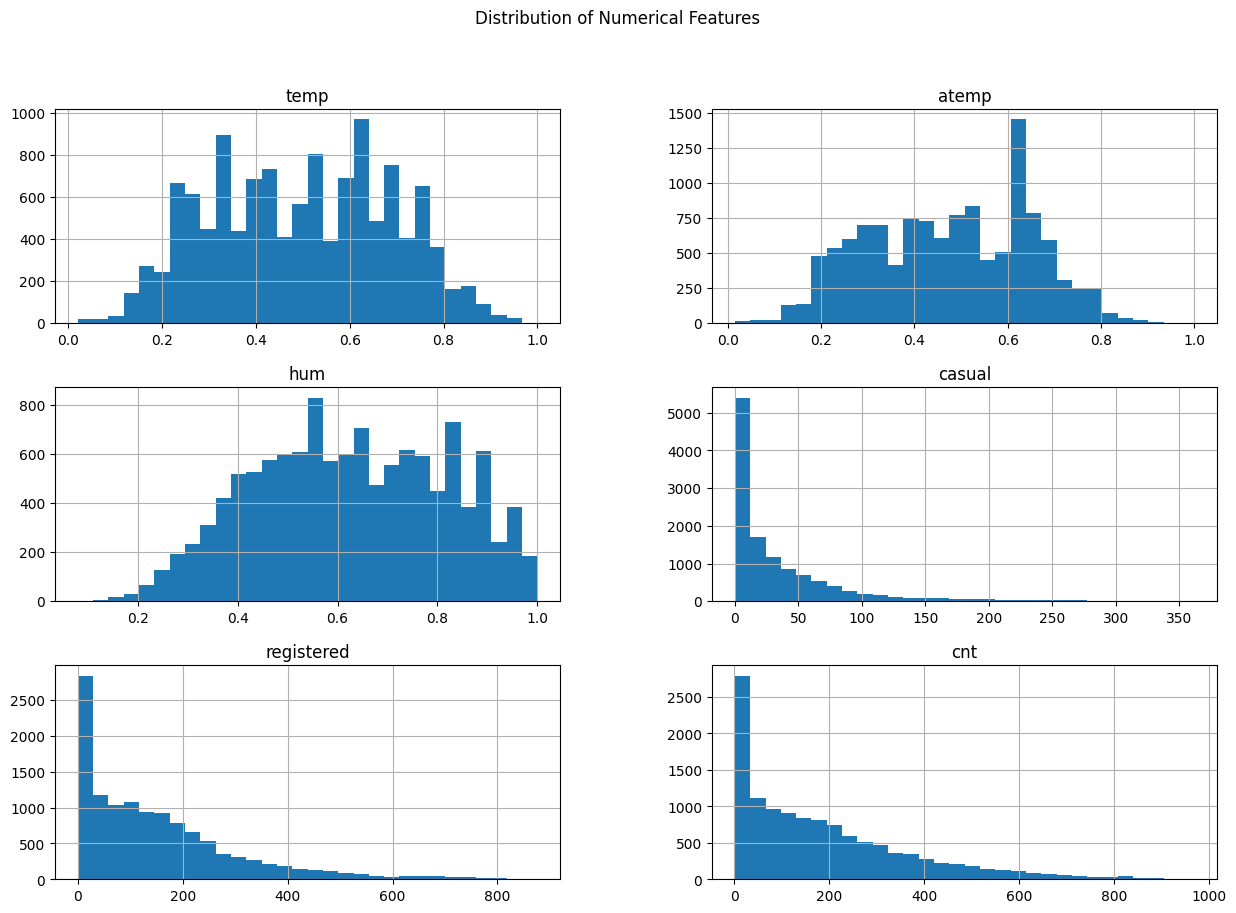

In [10]:
# Distribution Plots for Numerical Features
numerical_features = ['temp', 'atemp', 'hum', 'casual', 'registered', 'cnt']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

1. Temperature (temp): The distribution of temperature shows multiple peaks, suggesting several modes. Most values are clustered between 0.4 and 0.8, indicating that temperatures in this range occur most frequently.

2. Humidity (hum): This feature displays a skewed distribution with a peak around 0.6 to 0.7. The distribution tails off as humidity decreases, suggesting lower humidity levels are less common.

3. Adjusted Temperature (atemp): The adjusted temperature has a similar shape to the temperature distribution but with a more pronounced peak around 0.6, indicating a strong concentration of data points around this adjusted temperature value.

4. Casual Users (casual): The number of casual users is heavily skewed to the left, with most of the data points near the lower end, suggesting that days with fewer casual users are much more common than days with many.

    Registered Users (registered): The histogram for registered users is also skewed to the left but extends further along the x-axis compared to casual users, indicating that while lower counts are common, there are also more instances of higher counts.

5. Total Count (cnt): The total count of users combines the effects seen in the casual and registered distributions, showing a strong left skew with a long tail, indicating many days have a low total user count, with fewer days showing very high usage.

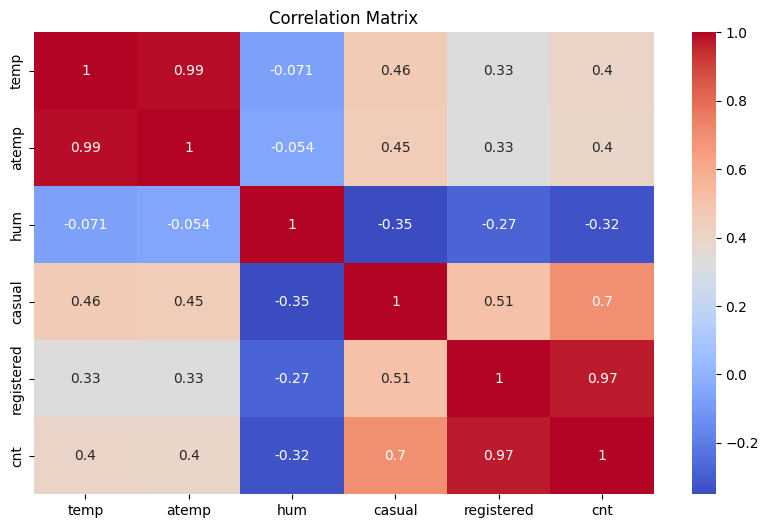

In [11]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Insights:
- Weather Impact: Higher temperatures positively impact bike usage, while higher humidity negatively impacts it.
- User Type: Casual users are more sensitive to weather changes than registered users.
- Feature Redundancy: Since temp and atemp are highly correlated, including both in the model may not provide additional information. One of them can be used to avoid multicollinearity.

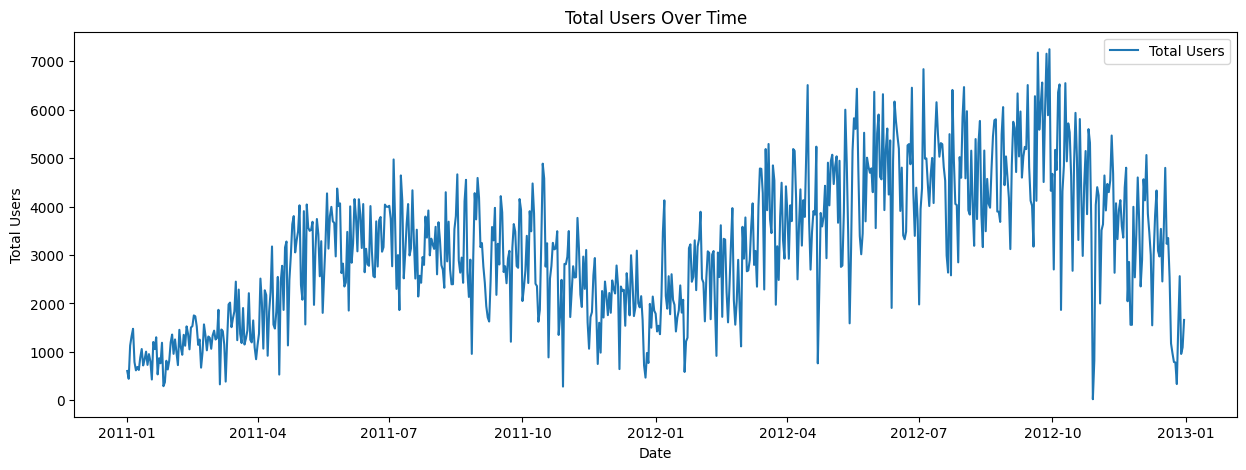

In [12]:
# Aggregate the data by day
daily_data = df.groupby('dteday')['cnt'].sum().reset_index()

# Plot the aggregated data
plt.figure(figsize=(15, 5))
plt.plot(daily_data['dteday'], daily_data['cnt'], label='Total Users')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.title('Total Users Over Time')
plt.legend()
plt.show()

1. Seasonal Trends: The graph shows clear seasonal fluctuations in user numbers.User activity typically peaks during the mid-year summer months and dips towards the end of the year and beginning of the next, suggesting reduced engagement during the colder months.
2. In overall, the data indicates a steady rise in the total number of users over the time period analyzed, pointing to an increase in user engagement. However, this growth seems to plateau, particularly towards the end of 2012.
3. Yearly Patterns: Each year seems to follow a similar pattern of a gradual increase leading to a peak, followed by a decrease. This cyclical pattern might be influenced by external factors such as weather, holidays, or school terms.
4. There are instances of sharp drops and rises in user counts. These could be due to specific events, promotions, or disruptions.


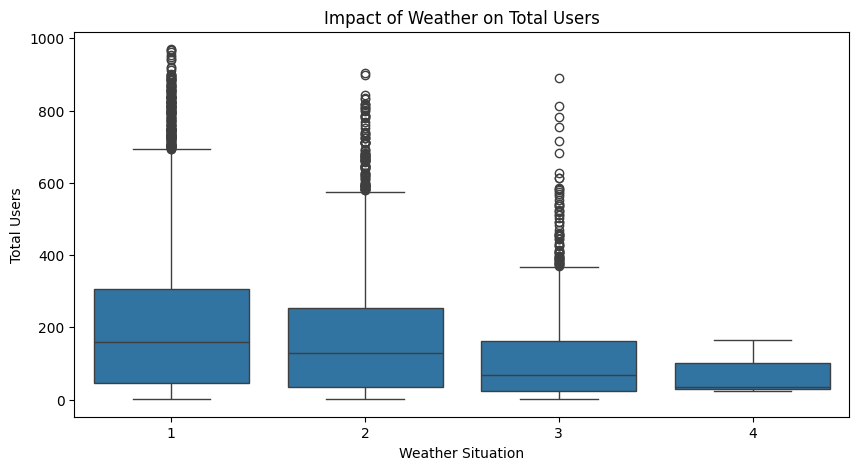

In [13]:
# Weather Impact
plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.xlabel('Weather Situation')
plt.ylabel('Total Users')
plt.title('Impact of Weather on Total Users')
plt.show()

From the plot of weather situation we can see that most of the trip occured when the weather is Clear and least when the weather is Raining. it is understandable that most people dont travel during rain

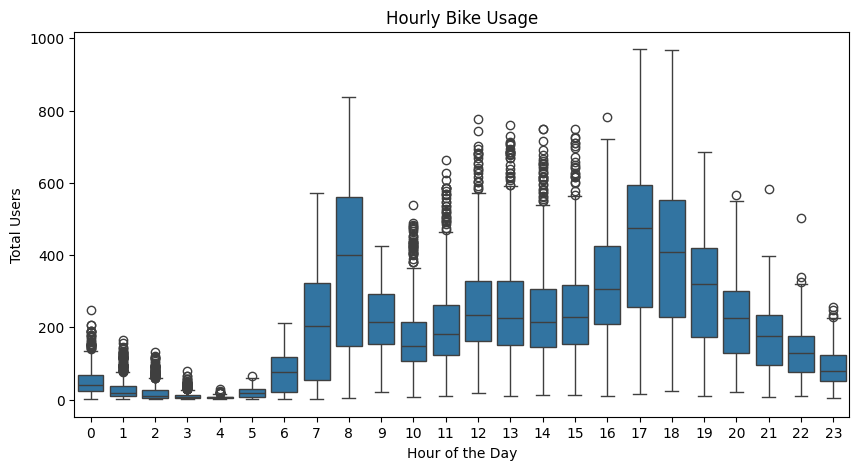

In [14]:
# Hourly Usage Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='hr', y='cnt', data=df)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Users')
plt.title('Hourly Bike Usage')
plt.show()

the data above clearly exhibits typical commuter patterns with peaks during traditional rush hours and lower usage during the night. Additionally, the presence of outliers during most hours suggests sporadic high usage, which could be influenced by specific events or weather conditions on particular days.

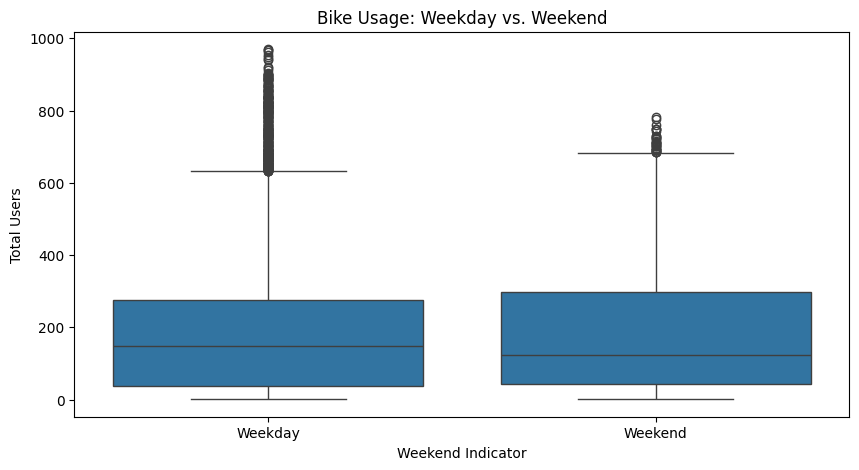

In [15]:
# Weekday vs. Weekend Usage
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_weekend', y='cnt', data=df)
plt.xlabel('Weekend Indicator')
plt.ylabel('Total Users')
plt.title('Bike Usage: Weekday vs. Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

the plot suggests that while bike usage is more consistent and slightly lower on weekdays, weekends experience higher variability and potential for increased usage. This might be due to recreational activities or leisure travel that is more common on weekends.

## Feature Engineering

In [16]:
# Extract additional date features
df['year'] = df['dteday'].dt.year
df['hour'] = df['hr']

In [17]:
# Create a feature for peak hours (7-9 AM and 4-6 PM are considered peak hours)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)

In [18]:
# Create interaction terms between weather and time-related features
df['temp_hour'] = df['temp'] * df['hour']
df['humidity_hour'] = df['hum'] * df['hour']

In [19]:
# Create lagged features for 'cnt'
df['cnt_lag1'] = df['cnt'].shift(1)
df['cnt_lag2'] = df['cnt'].shift(2)
df['cnt_lag3'] = df['cnt'].shift(3)

Here, i create lagged features because lag features help the model capture temporal dependencies and autocorrelation in the data. In a time series, the value of the target variable at a given time is often influenced by its values at previous time steps.
By including lagged values of the target variable, the model can learn from the patterns and trends in the historical data.

In [20]:
# Create rolling mean and rolling std deviation for 'cnt'
df['cnt_roll_mean'] = df['cnt'].rolling(window=3).mean()
df['cnt_roll_std'] = df['cnt'].rolling(window=3).std()

- The creation of rolling mean helps in smoothing out short-term fluctuations and highlighting longer-term trends in the data and it helps the model identify and learn from trends in the data over a specified window in this case the window is three hours
- Meanwhile rolling standard deviation measures the volatility or variability of the target variable over a specified window. High volatility might indicate periods of high uncertainty or change, it will helps the model understand the variability in the data over time, which can be crucial for forecasting.

In [21]:
# Drop rows with NaN values created by shifting and rolling operations
df.dropna(inplace=True)

In [22]:
# Display the first few rows to check the transformations
print(df.head())

      dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
3 2012-03-31  0.87           2        0       2  0.3485  0.36   8      19   
4 2012-07-31  0.55           1        0       3  0.6970  0.76  18      99   
5 2012-10-01  0.72           1        0       4  0.4545  0.46   0       6   
6 2012-08-28  0.54           1        0       3  0.6515  0.70  22      20   
7 2012-01-01  0.93           1        0       1  0.2727  0.26   9      13   

   registered  ...  year  hour  is_peak_hour  temp_hour  humidity_hour  \
3         126  ...  2012     8             1       2.88           6.96   
4         758  ...  2012    18             1      13.68           9.90   
5          39  ...  2012     0             0       0.00           0.00   
6         196  ...  2012    22             0      15.40          11.88   
7          27  ...  2012     9             1       2.34           8.37   

   cnt_lag1  cnt_lag2  cnt_lag3  cnt_roll_mean  cnt_roll_std  
3     107.0      18.0     250

## Modelling

In [23]:
from sklearn.model_selection import train_test_split

Data Splitting

In [24]:
# Define the feature set and target variable
X = df[['temp', 'hum', 'day_of_week', 'month', 'hour', 'is_weekend', 'is_peak_hour', 'temp_hour', 'humidity_hour', 'cnt_lag1', 'cnt_lag2', 'cnt_lag3', 'cnt_roll_mean', 'cnt_roll_std']]
y = df['cnt']

Train and Test Split

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

For this occasion i choose to try 4 different modelling such as ( Linear Regression, Random Forest, Gradient Boosting, Xtreme Gradient Boosting ). Why ? 
1. Linear Regression is used as a baseline model due to its simplicity and ease of interpretation it provides clear insights into how each feature impacts the target variable through coefficients
    - How it works : Linear Regression models the relationship between a dependent variable 𝑦 and one or more independent variables 𝑋 using a linear equation
    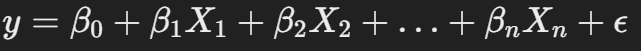
    - Where :
        - 𝑦 is the predicted value.
        - 𝑋1, 𝑋2, …, 𝑋𝑛 are the features.
        - 𝛽0 is the intercept.
        - 𝛽1, 𝛽2, …, 𝛽𝑛 are the coefficients.
        - ϵ is the error term.
2. Random Forest Regressor is used because it can capture complex, non-linear relationships between features and the target variable and it's robust to overfitting, especially in cases with a large number of features or when noise is present in the data
    - How it works : Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average of their predictions for regression tasks.
        - Bootstrap Aggregation (Bagging): It uses a technique called bagging, where multiple subsets of the data are sampled with replacement to train individual trees.
        - Decision Trees: Each tree is trained on a different random subset of the data and features.
        - Averaging: For regression, the final prediction is obtained by averaging the predictions of all the individual trees.
3. Gradient Boosting Regressor is chosen because Gradient Boosting Regressor provides superior predictive accuracy compared to other models, especially for structured data, it also allows fine-tuning of various hyperparameters to improve performance and reduces bias and variance through iterative improvements.
    - How it works : Gradient Boosting is an ensemble method that builds models sequentially, each correcting the errors of its predecessor.
        - Additive Model: It builds the model in a stage-wise fashion, adding one tree at a time.
        - Gradient Descent: Each new tree is fit on the residual errors of the previous trees, using gradient descent to minimize the loss function.
        - Weighted Averaging: Final predictions are obtained by combining the predictions of all trees with weights determined by their performance.
4. XGBoost Regressor is selected because XGBoost is optimized for speed and performance, handling large datasets efficiently, It includes regularization terms in the objective function to reduce overfitting, It provides features like tree pruning, parallel processing, and missing value handling
    - How it works : XGBoost (Extreme Gradient Boosting) is an optimized implementation of the gradient boosting framework. It includes several enhancements over traditional gradient boosting
        - Regularized Objective: It uses a regularized objective function to prevent overfitting.
        - Weighted Quantile Sketch: It efficiently handles large datasets by using a distributed weighted quantile sketch algorithm.
        - Tree Pruning: XGBoost employs a more accurate greedy algorithm for tree pruning.
        - Parallel Processing: It supports parallel tree boosting, speeding up the training process.

In [27]:
# Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = xgb.XGBRegressor(random_state=42)

In [28]:
# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [30]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [31]:
# Linear Regression Evaluation
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f'Linear Regression : \n MAE: {mae_lr} \n MSE: {mse_lr} \n RMSE: {rmse_lr} \n R2: {r2_lr}')

Linear Regression : 
 MAE: 3.8434652546962517e-13 
 MSE: 2.2346394877636186e-25 
 RMSE: 4.727197359708624e-13 
 R2: 1.0


Linear Regression:

- The MAE, MSE, RMSE values are extremely low (close to zero), and R2 is 1.0. This indicates that the Linear Regression model perfectly fits the training data.
- These results are suspiciously perfect, which suggests potential issues such as data leakage or overfitting. It might be due to perfect collinearity or an issue with how features are handled. It's critical to re-evaluate feature engineering and ensure there is no data leakage.

In [32]:
# Random Forest Evaluation
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest : \n MAE: {mae_rf} \n MSE: {mse_rf} \n RMSE: {rmse_rf} \n R2: {r2_rf}')

Random Forest : 
 MAE: 20.240378133990955 
 MSE: 1254.1999949856145 
 RMSE: 35.414686148342675 
 R2: 0.9619570786262113


The Random Forest model performs well with an R2 score of 0.96, indicating it explains 96% of the variance in the data. However, its error metrics (MAE, MSE, RMSE) are higher than Linear Regression, which suggests it might not be overfitting like Linear Regression.

In [33]:
# Gradient Boosting Evaluation
mae_gb, mse_gb, rmse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
print(f'Gradient Boosting : \n MAE: {mae_gb} \n MSE: {mse_gb} \n RMSE: {rmse_gb} \n R2: {r2_gb}')

Gradient Boosting : 
 MAE: 32.328872239031355 
 MSE: 2087.490110591137 
 RMSE: 45.689058981239015 
 R2: 0.9366813726173784


Gradient Boosting also performs well but slightly worse than Random Forest with an R2 score of 0.94 and higher error metrics.

In [34]:
# XGBoost Evaluation
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f'XGboost : \n MAE: {mae_xgb} \n MSE: {mse_xgb} \n RMSE: {rmse_xgb} \n R2: {r2_xgb}')

XGboost : 
 MAE: 16.709443091291995 
 MSE: 649.405478198405 
 RMSE: 25.48343536885098 
 R2: 0.9803019762039185


The XGboost model performs well with an R2 score of 0.98, indicating it explains 98% of the variance in the data. 

## Re - Evaluation Machine Learning Model

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Calculate VIF for each feature
X = df[['temp', 'hum', 'day_of_week', 'month', 'hour', 'is_weekend', 'is_peak_hour', 'temp_hour', 'humidity_hour', 'cnt_lag1', 'cnt_lag2', 'cnt_lag3', 'cnt_roll_mean', 'cnt_roll_std']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          feature        VIF
0            temp  29.591327
1             hum  24.746250
2     day_of_week   8.491058
3           month   5.025456
4            hour  25.403848
5      is_weekend   3.724705
6    is_peak_hour   1.811955
7       temp_hour  32.419985
8   humidity_hour  27.722317
9        cnt_lag1   6.507932
10       cnt_lag2   6.395575
11       cnt_lag3   2.068222
12  cnt_roll_mean  31.940163
13   cnt_roll_std   6.438806


The Variance Inflation Factor (VIF) values indicate that there is a high degree of multicollinearity among several features. Features with VIF values significantly higher than 10 should be addressed. Here are the features with high VIF values:

- temp (29.59)
- hum (24.75)
- hour (25.40)
- temp_hour (32.42)
- humidity_hour (27.72)
- cnt_roll_mean (31.94)

In [37]:
# Define the new feature set and target variable
X1 = df[['temp', 'hum', 'day_of_week', 'month', 'hour', 'is_weekend', 'is_peak_hour', 'cnt_lag1', 'cnt_lag2', 'cnt_lag3', 'cnt_roll_std']]
y1 = df['cnt']

from the VIF value above, I decided not to use temp_hour, humidity_hour, cnt_roll_mean because the VIF values is higher than 10

In [38]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X1.columns
vif_data1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]

print(vif_data1)

         feature       VIF
0           temp  7.215441
1            hum  7.216265
2    day_of_week  7.902986
3          month  4.885166
4           hour  3.503834
5     is_weekend  3.646024
6   is_peak_hour  1.396734
7       cnt_lag1  2.526775
8       cnt_lag2  2.534630
9       cnt_lag3  2.018925
10  cnt_roll_std  5.221265


In [39]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [40]:
# Train the models
lr.fit(X1_train, y1_train)
rf.fit(X1_train, y1_train)
gb.fit(X1_train, y1_train)
xgb.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# Predict on the test set
y1_pred_lr = lr.predict(X1_test)
y1_pred_rf = rf.predict(X1_test)
y1_pred_gb = gb.predict(X1_test)
y1_pred_xgb = xgb.predict(X1_test)

In [42]:
# Linear Regression Evaluation
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y1_test, y1_pred_lr)
print(f'Linear Regression : \n MAE: {mae_lr} \n MSE: {mse_lr} \n RMSE: {rmse_lr} \n R2: {r2_lr}')

Linear Regression : 
 MAE: 86.61231801920023 
 MSE: 12996.57505168711 
 RMSE: 114.00252212862272 
 R2: 0.6057824232206703


In [43]:
# Random Forest Evaluation
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y1_test, y1_pred_rf)
print(f'Random Forest : \n MAE: {mae_rf} \n MSE: {mse_rf} \n RMSE: {rmse_rf} \n R2: {r2_rf}')

Random Forest : 
 MAE: 32.903399095766545 
 MSE: 3094.887394697904 
 RMSE: 55.63171213164218 
 R2: 0.906124574798318


In [44]:
# Gradient Boosting Evaluation
mae_gb, mse_gb, rmse_gb, r2_gb = evaluate_model(y1_test, y1_pred_gb)
print(f'Gradient Boosting : \n MAE: {mae_gb} \n MSE: {mse_gb} \n RMSE: {rmse_gb} \n R2: {r2_gb}')

Gradient Boosting : 
 MAE: 47.959140295105186 
 MSE: 4791.618371150332 
 RMSE: 69.22151667762222 
 R2: 0.8546586177039777


In [45]:
# XGBoost Evaluation
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y1_test, y1_pred_xgb)
print(f'XGboost : \n MAE: {mae_xgb} \n MSE: {mse_xgb} \n RMSE: {rmse_xgb} \n R2: {r2_xgb}')

XGboost : 
 MAE: 36.132368759496735 
 MSE: 2987.8619120015896 
 RMSE: 54.66133836635899 
 R2: 0.9093708992004395


Insights from Re-evaluation
- Linear Regression:
    - The Linear Regression model shows a significant drop in performance with an R2 score of 0.61, which indicates that only 61% of the variance in the data is explained by the model.
    - The MAE, MSE, and RMSE values are considerably higher compared to the previous suspiciously perfect results. This suggests that the multicollinearity issue has been addressed, but the Linear Regression model is not the best fit for this dataset.

- Random Forest:
    - The Random Forest model continues to perform well with an R2 score of 0.91. It has the lowest MAE, MSE, and RMSE values among the models tested, indicating strong predictive performance.

- Gradient Boosting:
    - The Gradient Boosting model also performs well with an R2 score of 0.85. However, its error metrics are higher compared to the Random Forest model.

## Hyperparameter Tuning Random Forest Regressor

Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [48]:
# Fit the GridSearchCV to the data
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [49]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [50]:
# Predict on the test set using the best model
y1_pred_best_rf = best_rf.predict(X1_test)

In [51]:
# Evaluate the best model
mae_best_rf = mean_absolute_error(y1_test, y1_pred_best_rf)
mse_best_rf = mean_squared_error(y1_test, y1_pred_best_rf)
rmse_best_rf = mean_squared_error(y1_test, y1_pred_best_rf, squared=False)
r2_best_rf = r2_score(y1_test, y1_pred_best_rf)

In [52]:
# Best Model Random Forest Evaluation
print(f'Random Forest : \n MAE: {mae_best_rf} \n MSE: {mse_best_rf} \n RMSE: {rmse_best_rf} \n R2: {r2_best_rf}')

Random Forest : 
 MAE: 32.700153445677486 
 MSE: 3071.4093037950406 
 RMSE: 55.42029685769502 
 R2: 0.9068367221191561


In [53]:
# Get feature importance
rf_importance = rf.feature_importances_

In [54]:
# Create a DataFrame for visualization
rf_importance_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

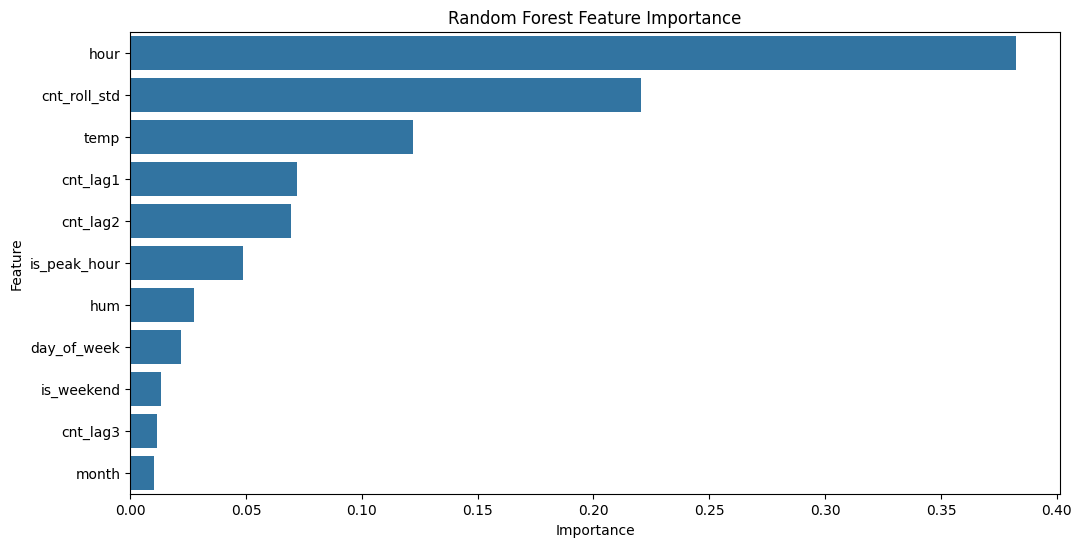

In [55]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Hyperparameter Tuning XGBOOST

In [56]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [57]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')


In [58]:
# Fit the GridSearchCV to the data
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [59]:
# Get the best parameters and the best model
best_params_xgb = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("Best parameters found: ", best_params_xgb)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}


In [60]:
# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X1_test)

In [61]:
# Evaluate the best model
mae_best_xgb = mean_absolute_error(y1_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y1_test, y_pred_best_xgb)
rmse_best_xgb = mean_squared_error(y1_test, y_pred_best_xgb, squared=False)
r2_best_xgb = r2_score(y1_test, y_pred_best_xgb)

In [62]:
# Best Model XGboost
print(f'XGboost : \n MAE: {mae_best_xgb} \n MSE: {mse_best_xgb} \n RMSE: {rmse_best_xgb} \n R2: {r2_best_xgb}')

XGboost : 
 MAE: 32.09134740742866 
 MSE: 2555.4385620301277 
 RMSE: 50.55134579840706 
 R2: 0.9224873781204224


In [63]:
# Get feature importance
xgb_importance = xgb.feature_importances_

In [64]:
# Create a DataFrame for visualization
xgb_importance_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

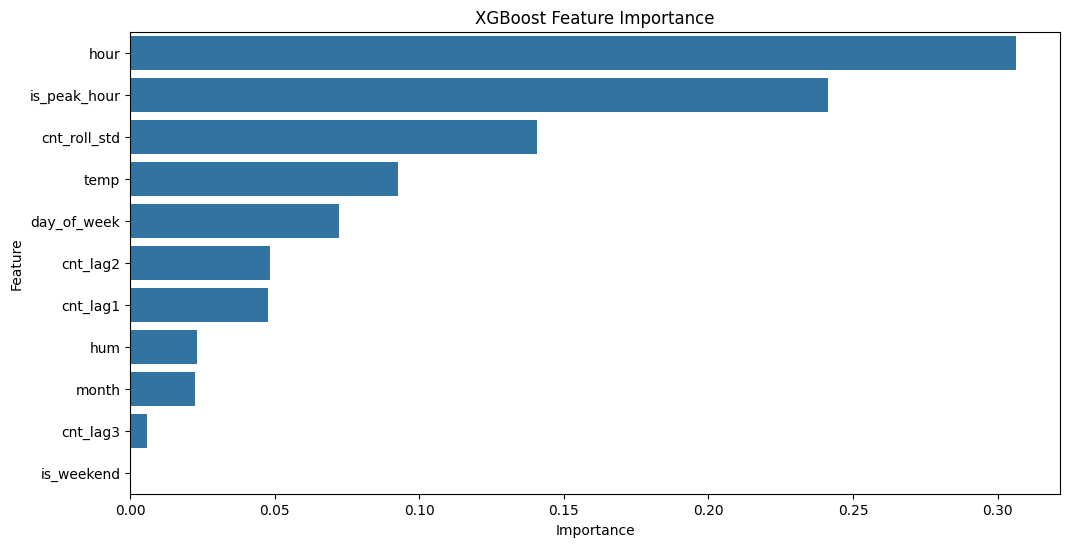

In [65]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Conclusion

The XGBoost model demonstrated strong performance in predicting hourly bike-sharing demand with an R-squared value of 0.922, indicating it captures a significant portion of the variance in the data. The model's Mean Absolute Error (MAE) of 32.09 and Root Mean Squared Error (RMSE) of 50.55 show that it can predict demand with reasonable accuracy, considering the complexity of factors influencing bike-sharing usage.

## Recommendations
1. Model Deployment for Real-Time Forecasting:

    Implementation: Deploy the XGBoost model in a real-time environment where it can continuously receive and analyze data on bike usage and weather conditions. This implementation will enable the bike-sharing company to dynamically adjust bike availability based on predicted demand.<br>
    Integration: Integrate the model with the company’s inventory and logistics management systems to automate bike redistribution and maintenance scheduling based on forecasted demand patterns.
2. Enhance Forecast Accuracy with Additional Data:

    Weather Integration: Continuously refine the model’s capability to factor in real-time weather data. Consider integrating more detailed meteorological data, such as real-time weather updates, to adjust forecasts dynamically as weather conditions change.<br>
    Event Data Incorporation: Incorporate data on local events (sports events, concerts, festivals) that could significantly impact bike usage. This integration will help in anticipating sudden spikes in demand.

3. Advanced Analytics for Error Reduction:

    Error Analysis: Conduct detailed error analysis to identify specific instances where the model overestimates or underestimates demand. Focus on the top 5% of errors in each category (overestimation and underestimation) to understand underlying factors and refine the model accordingly.<br>
    Adaptive Learning: Implement adaptive learning mechanisms that allow the model to learn from recent errors and adjust its predictions to minimize these errors in the future.

4. User Engagement and Feedback Loop:

    User Feedback: Establish mechanisms to collect and analyze user feedback on bike availability and service satisfaction. Use this data to further refine the model predictions.<br>
    Engagement Initiatives: Develop targeted user engagement initiatives based on model insights to boost usage during off-peak hours, such as promotional offers or gamified challenges.

5. Stakeholder Communication and Model Transparency:

    Regular Updates: Provide regular updates to stakeholders on model performance and improvements. This practice will help maintain trust and support for using model predictions in operational decisions.<br>
    Transparency: Maintain transparency about how predictions are made and how they are used in decision-making processes to build trust among users that the service is being managed efficiently and fairly.

6. Ongoing Training and Development:

    Continuous Improvement: Keep the model under continuous review and retraining to adapt to changing usage patterns and external conditions. Regularly update the dataset with new data to keep the model relevant.<br>
    R&D for Model Enhancements: Invest in research and development for exploring advanced predictive analytics techniques such as deep learning or ensemble models that might capture complex patterns more effectively.

## Implementation

In [66]:
import pickle

In [67]:
# Save the trained Random Forest Model to a file
with open('xgboost_bike_sharing_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)